<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Klasifikasi_Breast_Cancer_ROC_PR_Curve_Threshold_F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Topik: classification error, imbalance awareness, threshold tuning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, roc_curve, precision_recall_curve,
                             average_precision_score, confusion_matrix, classification_report)
#  Data & split
seed = 2025
print("Random seed:", seed)
X, y = load_breast_cancer(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)

Random seed: 2025


In [2]:
#  Pipeline & train
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced", solver="lbfgs"))
])
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=5000))])

In [3]:
#  Skor & metrik
proba = pipe.predict_proba(X_te)[:, 1]
auc = roc_auc_score(y_te, proba)
ap  = average_precision_score(y_te, proba)
prec, rec, thr = precision_recall_curve(y_te, proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1[:-1])
best_thr = thr[best_idx]
y_hat = (proba >= best_thr).astype(int)
cm = confusion_matrix(y_te, y_hat)

print(f"ROC AUC: {auc:.3f}")
print(f"PR AUC (Average Precision): {ap:.3f}")
print(f"Best F1: {f1[best_idx]:.3f} @ threshold={best_thr:.3f}")
print("Confusion matrix @best_thr:\n", cm)
print("Classification report:\n", classification_report(y_te, y_hat, digits=3))

ROC AUC: 0.985
PR AUC (Average Precision): 0.990
Best F1: 0.973 @ threshold=0.688
Confusion matrix @best_thr:
 [[49  4]
 [ 1 89]]
Classification report:
               precision    recall  f1-score   support

           0      0.980     0.925     0.951        53
           1      0.957     0.989     0.973        90

    accuracy                          0.965       143
   macro avg      0.968     0.957     0.962       143
weighted avg      0.966     0.965     0.965       143



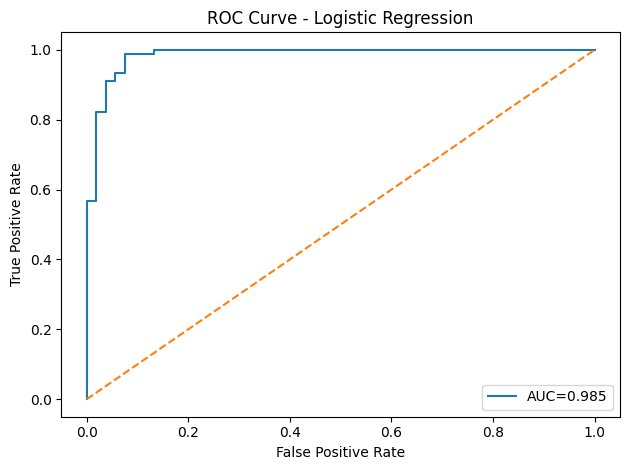

In [4]:
#  Grafik A - ROC Curve
fpr, tpr, _ = roc_curve(y_te, proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

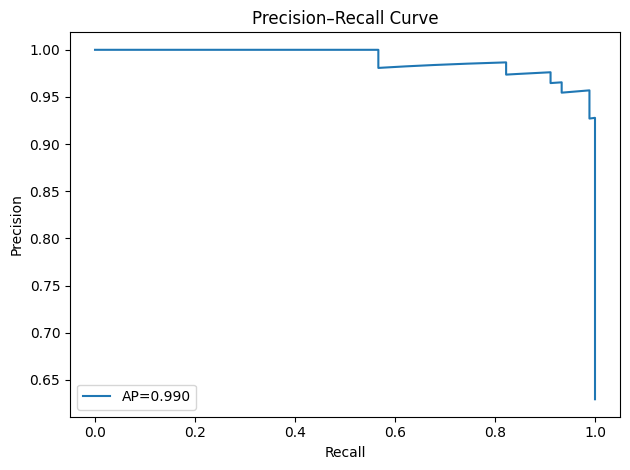

In [5]:
#  Grafik B - Precision–Recall Curve
plt.figure()
plt.plot(rec, prec, label=f"AP={ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()

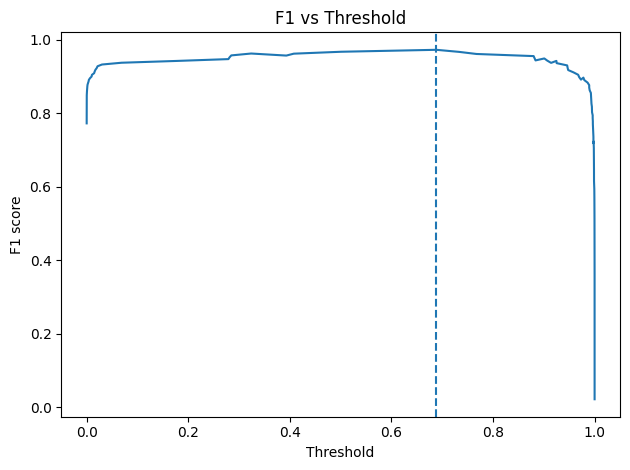

In [6]:
#  Grafik C - Threshold vs F1
plt.figure()
plt.plot(thr, f1[:-1])
plt.axvline(best_thr, linestyle="--")
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 vs Threshold")
plt.tight_layout()
plt.show()